# Californian baby names used in baby boom era 

In this data analysis, I want to explore in detail about the names that were greatly increased during baby boom, for both baby boy and girl. Also, the analysis goes through graphs to allow viewers to obtain some general ideas regarding the period of baby boom era.
Do keep in mind that the analysis is conducted only in the area of California.
[Note] Data was obtain from https://www.ssa.gov/oact/babynames/

In [82]:
#importing libraries for use

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [29]:
#loading data 

data = pd.read_csv('CA.TXT')

In [30]:
#data preview.
#Noticing how the column names are incorrect? Let me fix it before we start our process of analysis.

data.head()

,CA,F,1910,Mary,295
0,CA,F,1910,Helen,239
1,CA,F,1910,Dorothy,220
2,CA,F,1910,Margaret,163
3,CA,F,1910,Frances,134
4,CA,F,1910,Ruth,128


In [32]:
#after adding names of the column, there is no more issue with the data. 

data = pd.read_csv('CA.TXT', names= ['State', 'Sex', 'Year', 'Name', 'Count'])
data.head()

,State,Sex,Year,Name,Count
0,CA,F,1910,Mary,295
1,CA,F,1910,Helen,239
2,CA,F,1910,Dorothy,220
3,CA,F,1910,Margaret,163
4,CA,F,1910,Frances,134


In [33]:
#data description: 381214 entires, 5 features. It seems to me that the data is clean and well-organized. 
#the type of data include both types object and int64. 
#At this time, there is no need for further feature engineering. 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381214 entries, 0 to 381213
Data columns (total 5 columns):
State    381214 non-null object
Sex      381214 non-null object
Year     381214 non-null int64
Name     381214 non-null object
Count    381214 non-null int64
dtypes: int64(2), object(3)
memory usage: 14.5+ MB


In [61]:
#Checking if there is any NaN or null value(s) in the data for all columns
    
for i in range(0,5):
   if data.iloc[:,i].isnull().sum() == 0:
        print ('Index column', i, 'has 0 null value in the column')
   else:
        print('Index column', i, 'has at least 1 null value in the column')

Index column 0 has 0 null value in the column
Index column 1 has 0 null value in the column
Index column 2 has 0 null value in the column
Index column 3 has 0 null value in the column
Index column 4 has 0 null value in the column


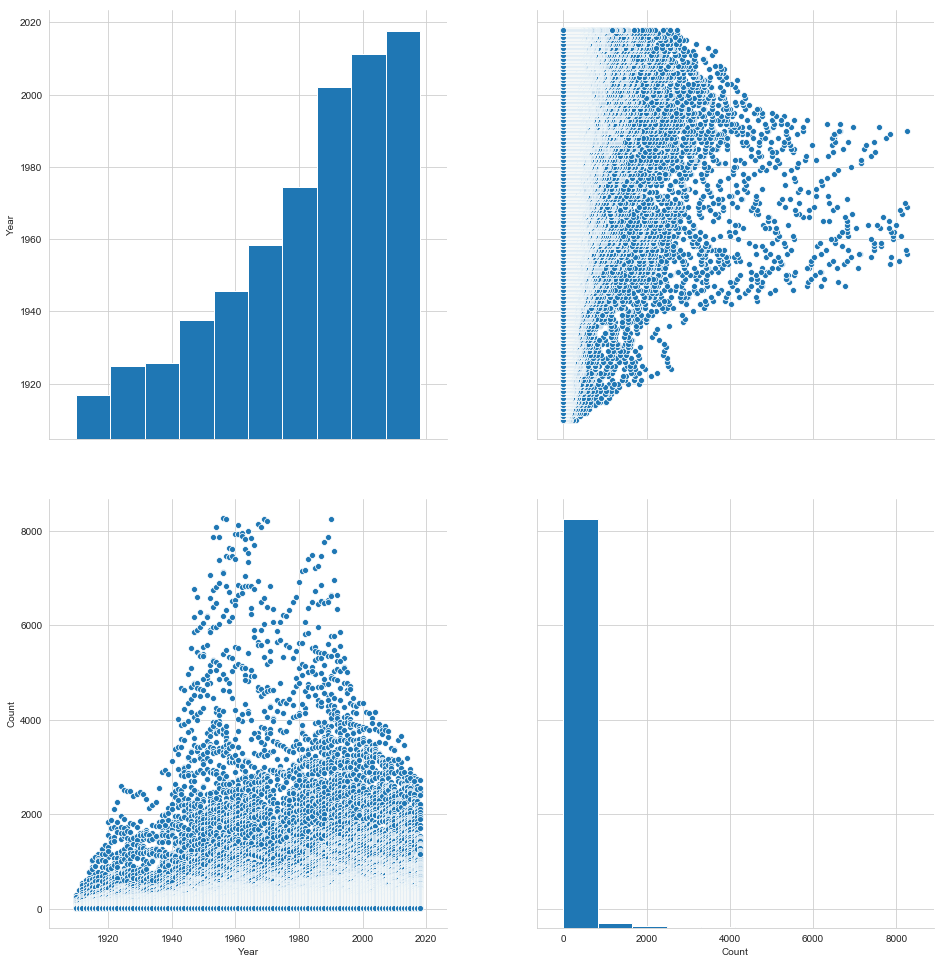

In [84]:
#The bottom left corner graph caught my attention.
#The U.S. birthrate increased from 1944 to 1961, and the graph makes sense because of the increase during the period.
#According to wikipedia (https://en.wikipedia.org/wiki/Baby_boom), the U.S fertility rate boombed after World War II 
# due to the fact that the U.S Congress passed G.I. Bill of Rights in order to encourage home ownership and better 
# education for all citizens. The way Congress made this work was by reducing loan's interest rate for post-war
# veterans. This strategy brought the U.S economy into a better level, providing people with better living standards. 


g=sns.pairplot(data, kind='scatter')
g.fig.set_size_inches(15,15)

Text(0.5, 1.0, 'Babes in California v.s. Year')

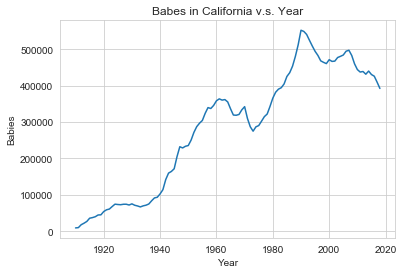

In [134]:
#How does the 'overall' birthrate change over time?
#First groupby the column 'year' from the data, and then graph.

total_babies = data.groupby(by='Year').sum()
plt.plot(total_babies)
plt.ylabel('Babies')
plt.xlabel('Year')
plt.title('Babes in California v.s. Year')

(100000, 400000)

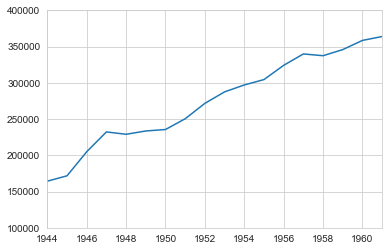

In [103]:
#Knowing that the baby boom start from 1944 to 1961, lets explore further into the baby boom period in California.
#Do keep in mind that the data only contains Californians. 

plt.plot(total_babies)
plt.xlim(1944,1961)
plt.ylim(100000, 400000)

In [131]:
#Wuestion: During baby boom era in California, how does male babies compare to female babies overall?
#first we need to generate a new table that has Year in the index, and sex and count in the columns.

year_sex_group = data.groupby(by=['Year','Sex']).sum().reset_index()
year_sex_group.head()

,Year,Sex,Count
0,1910,F,5950
1,1910,M,3213
2,1911,F,6602
3,1911,M,3381
4,1912,F,9803


Text(0.5, 1.0, 'Baby counts vs Year')

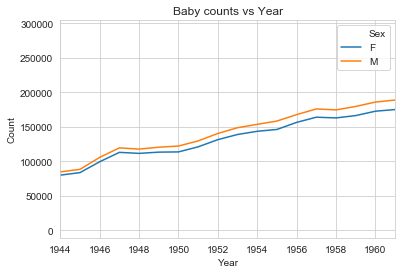

In [154]:
#data visualization
#The general idea from this graph is that both genders of babies increase almost at the same rate. Yet, male babies
#tend to be more than the females.

sns.lineplot(data = year_sex_group, x='Year', y='Count', hue='Sex')
plt.xlim(1944,1961)
plt.title('Baby counts vs Year')

In [197]:
#Question: During the U.S baby boom era, what names were the most popular for both gender??
#Answer: for baby boys, it is Michael, and for baby girls, it is Linda. 

#Top 5 male baby names during baby boom era 1944 and 1961.
print(data[(data['Sex'] == 'M') & (data['Year'] > 1943) & (data['Year'] < 1962)].sort_values(by=['Count'], ascending = False).head(5), '\n\n')


#Top 5 female baby names during baby boom era 1944 and 1961.
print(data[(data['Sex'] == 'F') & (data['Year'] > 1943) & (data['Year'] < 1962)].sort_values(by=['Count'], ascending = False).head(5))

       State Sex  Year     Name  Count
252289    CA   M  1956  Michael   8262
253314    CA   M  1957  Michael   8240
257660    CA   M  1961    David   8116
250320    CA   M  1954  Michael   8073
257661    CA   M  1961  Michael   7923 


      State Sex  Year   Name  Count
23818    CA   F  1947  Linda   6759
25049    CA   F  1948  Linda   6603
26276    CA   F  1949  Linda   6272
27519    CA   F  1950  Linda   5388
28742    CA   F  1951  Linda   4884


Text(0.5, 1.0, 'Year vs Counts for the name Michael')

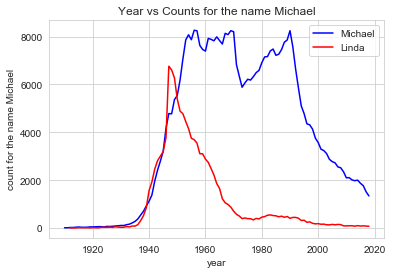

In [216]:
#Knowing that during baby boom era, the name Michael and Linda was greatly named, lets visualize the trend overtime.

year_Michael = data[(data['Sex'] == 'M') & (data['Name'] == 'Michael')]['Year']
count_Michael = data[(data['Sex'] == 'M') & (data['Name'] == 'Michael')]['Count']

year_Linda = data[(data['Sex'] == 'F') & (data['Name'] == 'Linda')]['Year']
count_Linda = data[(data['Sex'] == 'F') & (data['Name'] == 'Linda')]['Count']


plt.plot(year_Michael, count_Michael, label= 'Michael', color = 'blue')
plt.plot(year_Linda, count_Linda, label = 'Linda', color = 'red')
plt.xlabel('year')
plt.ylabel('count for the name Michael')
plt.legend()
plt.title('Year vs Counts for the name Michael')

In [236]:
#Interestingly, the name Linda reached its peak at around year 48, and started declining. Lets figure out the exact
#year.


data[(data['Count'] == count_Linda.max()) & (data['Sex'] == 'F')]

,State,Sex,Year,Name,Count
23818,CA,F,1947,Linda,6759


# Conclusion

In conclusion, we can see that the name Michael was not only the top 1 choice for naming a new born baby in the time period of baby boom era, but more importantly as the baby population increases, the usage of the name Michael also increased. This also applies to the name Linda, for baby girls. However, the name Linda actually started to decline after its peak at around year 1947, but at the same time, maintaining the top 1 baby name for several years.